In [37]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [38]:
tf.__version__

'2.9.1'

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("C:/Users/kdipu/AppData/Local/Temp/Temp1_DLNLP_GROUP 1.zip/train_dataset",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 3058 images belonging to 7 classes.


In [53]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("C:/Users/kdipu/AppData/Local/Temp/Temp1_DLNLP_GROUP 1.zip/test_dataset",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1303 images belonging to 7 classes.


In [43]:
cnn = tf.keras.models.Sequential()

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [45]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [47]:
cnn.add(tf.keras.layers.Flatten())

In [48]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [49]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [50]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [51]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
97/97 [==============================] - 28s 284ms/step - loss: 0.0189 - accuracy: 0.9916 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
97/97 [==============================] - 34s 347ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
97/97 [==============================] - 32s 325ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
97/97 [==============================] - 30s 306ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
97/97 [==============================] - 31s 325ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
97/97 [==============================] - 30s 313ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
97/97 [==============================] - 32s 334ms/step - loss: 0.0000e+00 - accuracy: 

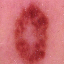

In [18]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/kdipu/AppData/Local/Temp/Temp1_DLNLP_GROUP 1.zip/test_dataset/test/ISIC_0028089.jpg", target_size = (64, 64))
test_image

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img( "C:/Users/kdipu/AppData/Local/Temp/Temp1_DLNLP_GROUP 1.zip/test_dataset/test/ISIC_0028089.jpg", target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 7:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'Actinic keratoses and intraepithelial carcinomae'
    
elif j == 1:
 prediction = ' basal cell carcinoma'
elif j == 2:
 prediction = 'benign keratosis-like lesions'
elif j == 3:
 prediction = 'dermatofibroma'
elif j == 4:
 prediction = ' melanocytic nevi'
elif j == 5:
 prediction = ' pyogenic granulomas and hemorrhage'
elif j == 6:
 prediction =  'melanoma'

1/1 [==============================] - 0s 19ms/step
0


In [20]:
print(prediction)

Actinic keratoses and intraepithelial carcinomae


In [ ]:
#THE END...